### Time Series Data Outlier Moinitoring

In [264]:
import pandas as pd 
import random as randn
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import seaborn as sns
from matplotlib import font_manager, rc
import numpy as np

In [265]:
# 한글 폰트 사용
def font_refresh():
    font_location = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)

In [266]:
# 고유값 부여 
def randn_generater(dataframe_length):
    key_list = []
    ran_num =  randn.random()
    for i in range(dataframe_length):
        while ran_num in key_list:
            ran_num =  randn.random()
        key_list.append(ran_num)
    return(key_list)


In [275]:
# 날짜 생성기 
def date_generator(start_date, end_date):
    start = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.datetime.strptime(end_date, "%Y-%m-%d") # 4월 13일 까지 생성
    date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
    date_list = []

    for date in date_generated:
        date_list.append(date.strftime("%Y-%m-%d"))
    return date_list
date_list = date_generator("2018-05-01","2020-04-14")
data = pd.read_csv("C:/Users/ghkdn/Jupyter/DAU.csv")
data['Period'] = date_list

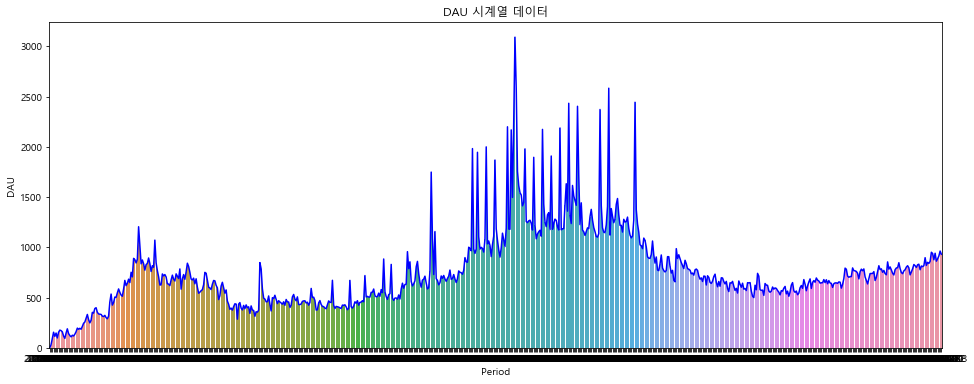

In [268]:
plt.figure(figsize = (16,6))
font_refresh()

data = data.reset_index()
plt.plot(data['DAU'],'b-')
sns.barplot(x="Period", y="DAU", data=data)
plt.title("DAU 시계열 데이터")
plt.show()

In [281]:
# [0, 1, 2, 3] , window_size = 2      =>   [ [0, 1], [1, 2], [2, 3] ]

def create_dataset(signal_data, window_size=10):
    dataX = []
    for i in range(len(signal_data)-window_size):
        dataX.append(signal_data[i:(i+window_size)])
    return np.array(dataX)

window_data = np.array(data['DAU'])
window_data = create_dataset(window_data,30)
window_size = 30 

window_data

array([[  1,  32,  91, ..., 244, 256, 293],
       [ 32,  91, 155, ..., 256, 293, 332],
       [ 91, 155, 114, ..., 293, 332, 281],
       ...,
       [749, 738, 766, ..., 941, 862, 886],
       [738, 766, 777, ..., 862, 886, 914],
       [766, 777, 804, ..., 886, 914, 963]], dtype=int64)

In [282]:
outlier_list = []
set_num = []

In [283]:
for set_num in range(len(window_data)):
    print("세트:",window_data[set_num])
    set_mean = window_data[set_num].mean()
    set_std = window_data[set_num].std()
    up_boundary = set_mean + 3*set_std
    down_boundary = set_mean - 3*set_std
    print("상위구간:",up_boundary,"하위구간:",down_boundary)
    
    for index_num in range(window_size):
        temp = window_data[set_num][index_num]
        #print("원소:", temp)
        
        if temp >= up_boundary or temp <= down_boundary:
            print("이상치:",temp)
            outlier_num = set_num+index_num
            outlier_numList.append(outlier_num)           

세트: [  1  32  91 155 114 147  98 155 176 171 159 117  94 146 189 142 122 109
 125 118 135 160 196 185 194 185 213 244 256 293]
상위구간: 329.14622524420395 하위구간: -27.67955857753728
세트: [ 32  91 155 114 147  98 155 176 171 159 117  94 146 189 142 122 109 125
 118 135 160 196 185 194 185 213 244 256 293 332]
상위구간: 345.7960393222295 하위구간: -22.2627059888961
세트: [ 91 155 114 147  98 155 176 171 159 117  94 146 189 142 122 109 125 118
 135 160 196 185 194 185 213 244 256 293 332 281]
상위구간: 350.2331452357945 하위구간: -10.09981190246117
세트: [155 114 147  98 155 176 171 159 117  94 146 189 142 122 109 125 118 135
 160 196 185 194 185 213 244 256 293 332 281 248]
상위구간: 354.63234510260554 하위구간: -4.032345102605518
세트: [114 147  98 155 176 171 159 117  94 146 189 142 122 109 125 118 135 160
 196 185 194 185 213 244 256 293 332 281 248 274]
상위구간: 365.860771611062 하위구간: -7.327438277728589
세트: [147  98 155 176 171 159 117  94 146 189 142 122 109 125 118 135 160 196
 185 194 185 213 244 256 293 332 281 248 27

상위구간: 904.8204405839545 하위구간: 458.84622608271223
세트: [683 665 736 713 689 785 584 685 729 682 755 842 810 752 684 676 693 637
 687 604 543 554 568 579 628 751 742 673 603 595]
상위구간: 904.0904181807188 하위구간: 451.0429151526147
세트: [665 736 713 689 785 584 685 729 682 755 842 810 752 684 676 693 637 687
 604 543 554 568 579 628 751 742 673 603 595 580]
상위구간: 906.6281504798667 하위구간: 441.6385161867999
세트: [736 713 689 785 584 685 729 682 755 842 810 752 684 676 693 637 687 604
 543 554 568 579 628 751 742 673 603 595 580 633]
상위구간: 906.5750391075709 하위구간: 439.55829422576255
세트: [713 689 785 584 685 729 682 755 842 810 752 684 676 693 637 687 604 543
 554 568 579 628 751 742 673 603 595 580 633 670]
상위구간: 901.7286167580578 하위구간: 440.00471657527555
세트: [689 785 584 685 729 682 755 842 810 752 684 676 693 637 687 604 543 554
 568 579 628 751 742 673 603 595 580 633 670 667]
상위구간: 899.0026608457376 하위구간: 439.66400582092916
세트: [785 584 685 729 682 755 842 810 752 684 676 693 637 687 604 543 554 

세트: [389 428 467 452 452 672 424 391 412 408 405 398 391 425 423 428 407 379
 393 671 409 395 415 458 444 469 424 452 455 469]
상위구간: 641.2160387124406 하위구간: 239.11729462089278
이상치: 672
이상치: 671
세트: [428 467 452 452 672 424 391 412 408 405 398 391 425 423 428 407 379 393
 671 409 395 415 458 444 469 424 452 455 469 458]
상위구간: 641.6731926641851 하위구간: 243.26014066914814
이상치: 672
이상치: 671
세트: [467 452 452 672 424 391 412 408 405 398 391 425 423 428 407 379 393 671
 409 395 415 458 444 469 424 452 455 469 458 719]
상위구간: 700.5914037602179 하위구간: 203.74192957311556
이상치: 719
세트: [452 452 672 424 391 412 408 405 398 391 425 423 428 407 379 393 671 409
 395 415 458 444 469 424 452 455 469 458 719 506]
상위구간: 703.4727465927356 하위구간: 203.46058674059765
이상치: 719
세트: [452 672 424 391 412 408 405 398 391 425 423 428 407 379 393 671 409 395
 415 458 444 469 424 452 455 469 458 719 506 512]
상위구간: 707.4473008431843 하위구간: 203.48603249014903
이상치: 719
세트: [672 424 391 412 408 405 398 391 425 423 428 407 379 

세트: [ 739  651  603  674  683  713  645  586  598  762 1749 1088  729 1157
  688  671  627  648  715  692  720  685  662  690  713  774  682  689
  729  684]
상위구간: 1408.7304232206113 하위구간: 87.66957677938876
이상치: 1749
세트: [ 651  603  674  683  713  645  586  598  762 1749 1088  729 1157  688
  671  627  648  715  692  720  685  662  690  713  774  682  689  729
  684  650]
상위구간: 1407.871100141112 하위구간: 82.59556652555466
이상치: 1749
세트: [ 603  674  683  713  645  586  598  762 1749 1088  729 1157  688  671
  627  648  715  692  720  685  662  690  713  774  682  689  729  684
  650  687]
상위구간: 1407.817646724572 하위구간: 85.04901994209467
이상치: 1749
세트: [ 674  683  713  645  586  598  762 1749 1088  729 1157  688  671  627
  648  715  692  720  685  662  690  713  774  682  689  729  684  650
  687  765]
상위구간: 1408.4140595201443 하위구간: 95.25260714652256
이상치: 1749
세트: [ 683  713  645  586  598  762 1749 1088  729 1157  688  671  627  648
  715  692  720  685  662  690  713  774  682  689  729  68

상위구간: 1992.5347068638812 하위구간: 316.3986264694522
이상치: 2444
세트: [1219 1219 1152 1279 1252 1257 1301 1188 1122 1094 1113 1271 2444 1374
 1233 1151 1025 1016  987 1092 1069 1003  906  892  890  929 1063  924
  843  904]
상위구간: 1983.35323713715 하위구간: 297.44676286285016
이상치: 2444
세트: [1219 1152 1279 1252 1257 1301 1188 1122 1094 1113 1271 2444 1374 1233
 1151 1025 1016  987 1092 1069 1003  906  892  890  929 1063  924  843
  904  774]
상위구간: 1989.864769175286 하위구간: 261.2685641580472
이상치: 2444
세트: [1152 1279 1252 1257 1301 1188 1122 1094 1113 1271 2444 1374 1233 1151
 1025 1016  987 1092 1069 1003  906  892  890  929 1063  924  843  904
  774  768]
상위구간: 1994.113799391745 하위구간: 226.95286727492157
이상치: 2444
세트: [1279 1252 1257 1301 1188 1122 1094 1113 1271 2444 1374 1233 1151 1025
 1016  987 1092 1069 1003  906  892  890  929 1063  924  843  904  774
  768  836]
상위구간: 1995.438775126474 하위구간: 204.56122487352604
이상치: 2444
세트: [1252 1257 1301 1188 1122 1094 1113 1271 2444 1374 1233 1151 1025 1016


상위구간: 766.877537410624 하위구간: 498.25579592270947
세트: [733 653 608 660 613 697 695 659 636 661 591 560 647 644 661 612 571 592
 545 665 632 603 643 584 590 570 648 646 649 564]
상위구간: 759.9716031344767 하위구간: 495.49506353218993
세트: [653 608 660 613 697 695 659 636 661 591 560 647 644 661 612 571 592 545
 665 632 603 643 584 590 570 648 646 649 564 513]
상위구간: 753.1695748279702 하위구간: 487.63042517202973
세트: [608 660 613 697 695 659 636 661 591 560 647 644 661 612 571 592 545 665
 632 603 643 584 590 570 648 646 649 564 513 500]
상위구간: 761.6683367398837 하위구간: 468.93166326011624
세트: [660 613 697 695 659 636 661 591 560 647 644 661 612 571 592 545 665 632
 603 643 584 590 570 648 646 649 564 513 500 623]
상위구간: 762.1667995140974 하위구간: 469.4332004859025
세트: [613 697 695 659 636 661 591 560 647 644 661 612 571 592 545 665 632 603
 643 584 590 570 648 646 649 564 513 500 623 578]
상위구간: 758.6639193880007 하위구간: 467.4694139453327
세트: [697 695 659 636 661 591 560 647 644 661 612 571 592 545 665 632 603 6

상위구간: 884.3638401498162 하위구간: 641.0361598501839
세트: [739 740 740 758 670 701 757 817 778 786 752 770 738 727 855 783 805 775
 742 725 778 795 797 847 788 749 738 766 777 804]
상위구간: 882.7785851604253 하위구간: 650.3547481729081
세트: [740 740 758 670 701 757 817 778 786 752 770 738 727 855 783 805 775 742
 725 778 795 797 847 788 749 738 766 777 804 817]
상위구간: 887.4013908385443 하위구간: 650.9319424947889
세트: [740 758 670 701 757 817 778 786 752 770 738 727 855 783 805 775 742 725
 778 795 797 847 788 749 738 766 777 804 817 796]
상위구간: 888.9692905304494 하위구간: 653.0973761362172
세트: [758 670 701 757 817 778 786 752 770 738 727 855 783 805 775 742 725 778
 795 797 847 788 749 738 766 777 804 817 796 726]
상위구간: 889.8411819664574 하위구간: 651.292151366876
세트: [670 701 757 817 778 786 752 770 738 727 855 783 805 775 742 725 778 795
 797 847 788 749 738 766 777 804 817 796 726 755]
상위구간: 889.846899536267 하위구간: 651.0864337970664
세트: [701 757 817 778 786 752 770 738 727 855 783 805 775 742 725 778 795 797
 8

In [284]:
outlier_numList = set(outlier_numList)
outlier_numList = list(outlier_numList)
outlier_numList.sort()
outlier_numList 
outlier_DF = pd.DataFrame({"Period":[0],"DAU":[0]})
for i in outlier_numList:
    outlier_DF = outlier_DF.append(data.iloc[i:i+1,:])
outlier_DF = outlier_DF.drop(0)
outlier_DF = outlier_DF.drop(['index'],1)

In [285]:
outlier_DF.to_csv("outlier_report.csv")

In [286]:
outlier_DF

,DAU,Period
71,1205,2018-07-11
84,1072,2018-07-24
168,848,2018-10-16
169,786,2018-10-17
209,591,2018-11-26
226,672,2018-12-13
240,671,2018-12-27
252,719,2019-01-08
267,884,2019-01-23
273,830,2019-01-29
